In [1]:
import torchvision
import torch
from torchvision.models.detection import ssdlite320_mobilenet_v3_large
from torchvision.models.mobilenetv3 import MobileNet_V3_Large_Weights
import os
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor, FasterRCNN_MobileNet_V3_Large_320_FPN_Weights

model = ssdlite320_mobilenet_v3_large(weights=None, num_classes=3,  weights_backbone=MobileNet_V3_Large_Weights.DEFAULT) # we do not specify pretrained=True, i.e. do not load default weights
#model.load_state_dict(torch.load(''))




checkpoint = torch.load("Results/Models/SSDLite__adam_epochs_40_train_backbone_True_lr_0.0001_lrstepsize_5_lrgamma_0.1_mom_0.9_final.pth")
model.load_state_dict(checkpoint['model'])


# set the device (GPU is much faster)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

FileNotFoundError: [Errno 2] No such file or directory: 'Results/Models/SSDLite__adam_epochs_40_train_backbone_True_lr_0.0001_lrstepsize_5_lrgamma_0.1_mom_0.9_final.pth'

# Plots for the seperate classification and regression losses

In [2]:
import matplotlib.pyplot as plt

plt.plot(checkpoint["losses_train"], label="training loss")
plt.plot(checkpoint["losses_val"], label="validation loss")
plt.title(modelFile)
plt.legend()
plt.ylim((0, 0.3))
plt.show()

NameError: name 'checkpoint' is not defined

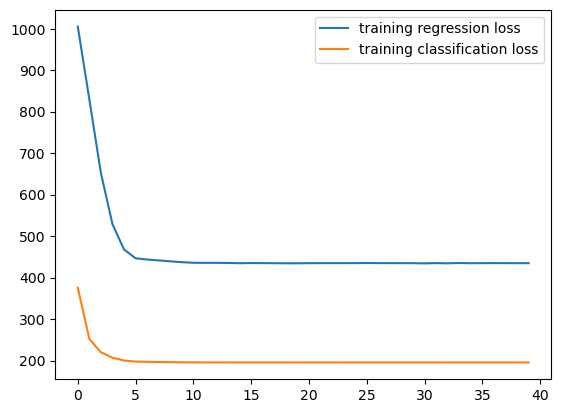

In [ ]:
import matplotlib.pyplot as plt

regression_loss_train = [val.detach().cpu().numpy() for val in checkpoint["regression_loss_train"]]
classification_loss_train = [val.detach().cpu().numpy() for val in checkpoint["classification_loss_train"]]

plt.plot(regression_loss_train, label="training regression loss")
plt.plot(classification_loss_train, label="training classification loss")
#plt.title(modelFile)
plt.legend()
#plt.ylim((0, 0.3))
plt.show()

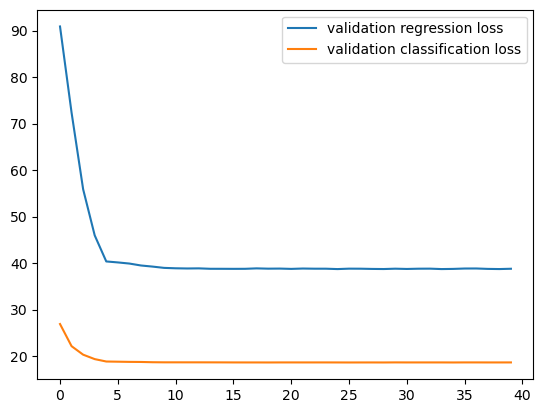

In [ ]:
import matplotlib.pyplot as plt

regression_loss_val = [val.detach().cpu().numpy() for val in checkpoint["regression_loss_val"]]
classification_loss_val = [val.detach().cpu().numpy() for val in checkpoint["classification_loss_val"]]

plt.plot(regression_loss_val, label="validation regression loss")
plt.plot(classification_loss_val, label="validation classification loss")
#plt.title(modelFile)
plt.legend()
#plt.ylim((0, 0.3))
plt.show()

In [ ]:
"""
import matplotlib.pyplot as plt

model = ssdlite320_mobilenet_v3_large(weights=None, num_classes=3, weights_backbone=None) # we do not specify pretrained=True, i.e. do not load default weights

modelsFolder = "Results/Models"

for modelFile in os.listdir(modelsFolder):
    path = os.path.join(modelsFolder, modelFile)
    checkpoint = torch.load(path)

    #model.load_state_dict(checkpoint['model'])

    plt.plot(checkpoint["losses_train"], label="training loss")
    plt.plot(checkpoint["losses_val"], label="validation loss")
    plt.title(modelFile)
    plt.legend()
    plt.ylim((0, 0.3))
    plt.show()

"""

'\nimport matplotlib.pyplot as plt\n\nmodel = ssdlite320_mobilenet_v3_large(weights=None, num_classes=3, weights_backbone=None) # we do not specify pretrained=True, i.e. do not load default weights\n\nmodelsFolder = "Results/Models"\n\nfor modelFile in os.listdir(modelsFolder):\n    path = os.path.join(modelsFolder, modelFile)\n    checkpoint = torch.load(path)\n\n    #model.load_state_dict(checkpoint[\'model\'])\n\n    plt.plot(checkpoint["losses_train"], label="training loss")\n    plt.plot(checkpoint["losses_val"], label="validation loss")\n    plt.title(modelFile)\n    plt.legend()\n    plt.ylim((0, 0.3))\n    plt.show()\n\n'

In [ ]:
from torch.utils.data import DataLoader
from src.dataLoading import playersDataset, collate_fn   # these are custom for our dataset




num_workers = 1 if torch.cuda.is_available() else 0
batch_size = 8 # LOWER THIS IF NEEDED!

train_dir = "Data/train/"
valid_dir = "Data/valid/"
test_dir = "Data/valid/"
train_dataset = playersDataset(train_dir)
validation_dataset = playersDataset(valid_dir)
test_dataset = playersDataset(test_dir)

# Define the dataloaders for each set
train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn)
val_loader = DataLoader(validation_dataset, batch_size=batch_size, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

In [ ]:
from Evaluation.engine import evaluate


evaluate(model=model, data_loader=test_loader, device=device)

creating index...
index created!
Test:  [ 0/56]  eta: 0:00:41  model_time: 0.1908 (0.1908)  evaluator_time: 0.2634 (0.2634)  time: 0.7430  data: 0.0222  max mem: 1726
Test:  [55/56]  eta: 0:00:00  model_time: 0.0824 (0.0828)  evaluator_time: 0.2814 (0.2920)  time: 0.4039  data: 0.0296  max mem: 1726
Test: Total time: 0:00:23 (0.4116 s / it)
Averaged stats: model_time: 0.0824 (0.0828)  evaluator_time: 0.2814 (0.2920)
Accumulating evaluation results...
DONE (t=0.57s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=

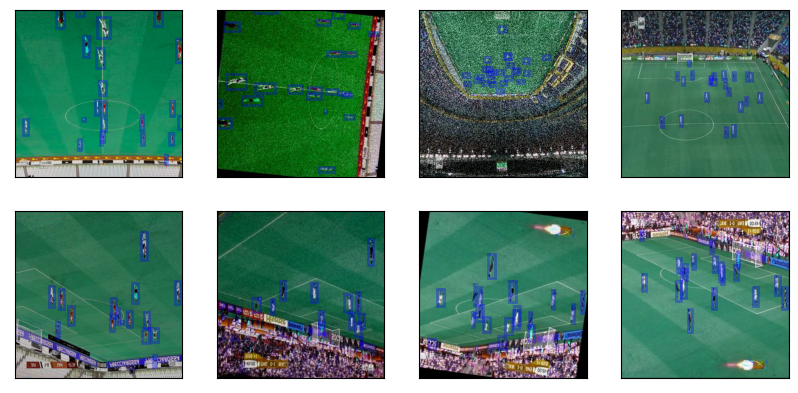

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Colours = ['r','g','b']

def visualize_imgs(imgs, annotations, true_annotations, rows, cols, threshold, tensors=False):
    CLASSES = ["","ball", "player"]
    fig = plt.figure(figsize=(10,10))
    
    for i in range(len(imgs)):
        ax = fig.add_subplot(rows, cols, i + 1, xticks=[], yticks=[])

        boxes = annotations[i]['boxes']
        true_boxes = true_annotations[i]['boxes']
        labels = annotations[i]['labels']
        scores = annotations[i]['scores']
        
        img = None



        if(tensors):
            img = imgs[i].cpu().numpy().transpose(1, 2, 0)
        else:
            img = imgs[i].numpy().transpose(1, 2, 0)
        ax.imshow(img, origin='upper')

        for j, (box, score, label) in enumerate(zip(boxes, scores,labels)):
            if(score < threshold):
                continue
            top, left = int(box[0]), int(box[1])
            width = int(box[2] - box[0])
            height = int(box[3] - box[1])

            #top, left, width, height = [448*i for i in boxes[i][0:]]
            rect = patches.Rectangle((top, left), width, height, edgecolor='r', facecolor='none', linewidth=0.5)
            ax.add_patch(rect)

            #ax.text(top, left, CLASSES[int(labels[j])], horizontalalignment='left', verticalalignment='bottom', color='white', weight='bold')
        
        for j, box in enumerate(true_boxes):
            top, left = int(box[0]), int(box[1])
            width = int(box[2] - box[0])
            height = int(box[3] - box[1])

            #top, left, width, height = [448*i for i in boxes[i][0:]]
            rect = patches.Rectangle((top, left), width, height, edgecolor='b', alpha=0.3, facecolor='none', linewidth=2.0)
            ax.add_patch(rect)

            # ax.text(top, left, CLASSES[int(labels[j])], horizontalalignment='left', verticalalignment='bottom', color='white', weight='bold')

    plt.show()


model.eval()
images, targets = next(iter(train_loader))
images = list(image.to(device) for image in images)
preds = model(images)

threshold = 0.3

fig = visualize_imgs(images, preds, targets, rows=4, cols=4, threshold = threshold, tensors=True)